<a href="https://colab.research.google.com/github/GGiovanni9152/MNIST-CNN/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


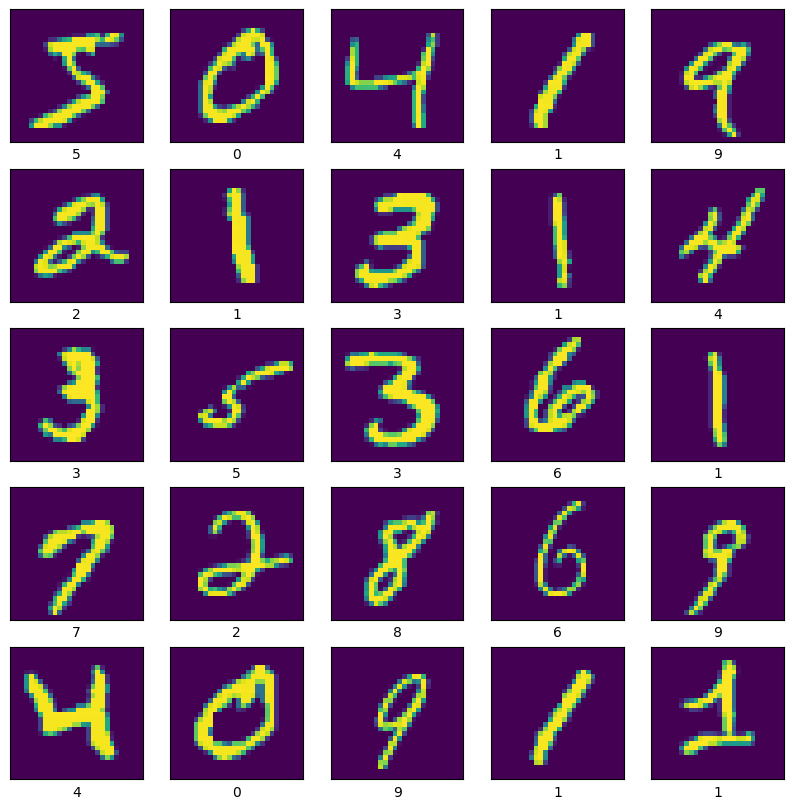

In [ ]:
class_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(train_labels[i])
plt.show()

In [ ]:
print(train_images.shape)

(60000, 28, 28)


In [ ]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [ ]:
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10))

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

In [ ]:
train_images.shape

(10000, 28, 28)

In [ ]:
train_images_new = train_images.reshape(60000, 28, 28, 1)
test_images_new = test_images.reshape(10000, 28, 28, 1)

train_labels_new = train_labels.reshape(60000, 1)
test_labels_new = test_labels.reshape(10000, 1)


In [ ]:
model1.compile(optimizer = "adam",
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

history = model1.fit(train_images_new, train_labels_new, epochs=10,
                    validation_data=(test_images_new, test_labels_new))

Epoch 1/10
1875/1875 [==============================] - 52s 27ms/step - loss: 0.1466 - accuracy: 0.9542 - val_loss: 0.0427 - val_accuracy: 0.9859
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0453 - accuracy: 0.9861 - val_loss: 0.0417 - val_accuracy: 0.9860
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0329 - accuracy: 0.9897 - val_loss: 0.0284 - val_accuracy: 0.9901
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0256 - accuracy: 0.9918 - val_loss: 0.0264 - val_accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.0372 - val_accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0165 - accuracy: 0.9948 - val_loss: 0.0306 - val_accuracy: 0.9913
Epoch 7/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.0271 -

313/313 - 3s - loss: 0.0371 - accuracy: 0.9908 - 3s/epoch - 8ms/step


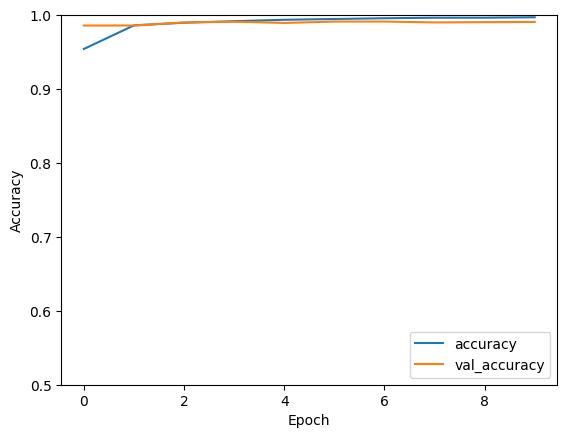

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(test_images_new,  test_labels_new, verbose=2)

In [ ]:
test_res = model1.predict(test_images_new)

313/313 [==============================] - 2s 7ms/step


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
test_res[0]
test_classes = test_res.argmax(axis = -1)
test_classes[0]

7

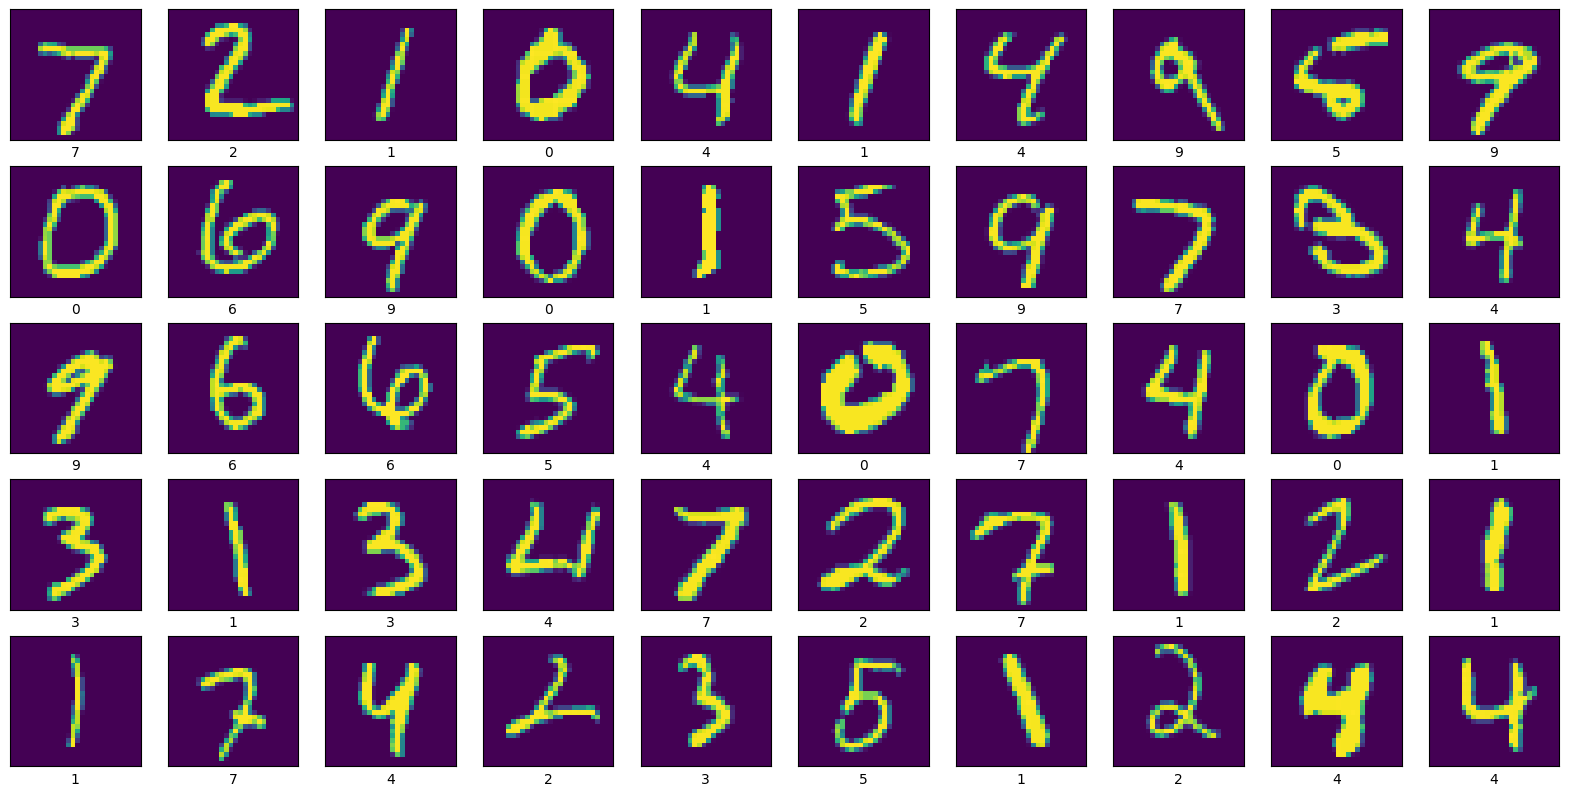

In [ ]:
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(test_classes[i])
plt.show()